# ***Movie Reviews detection ***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/Book1.csv')

In [ ]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
10017,"The story is incredible, it begins with a new ...",positive
10018,Ted Danson was a great choice to play Gulliver...,positive
10019,*Possible Spoilers* Although done before (and ...,positive
10020,Although i watched this film by myself(thankfu...,negative


** Data preproessing
  **

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10022 entries, 0 to 10021
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     10022 non-null  object
 1   sentiment  10022 non-null  object
dtypes: object(2)
memory usage: 156.7+ KB


In [ ]:
df.isnull().sum()

,0
review,0
sentiment,0


In [ ]:
df.value_counts()

,,count
review,sentiment,
"There are plenty of comments already posted saying exactly how I felt about this film so Ill keep it short.<br /><br />""The Grinch"" I thought was marvellous - Jim Carrey is a truly talented, physical comedian as well as being a versatile clever actor (in my opinion). Mike Myers on the other hand gets his laughs by being annoying. I used to like him very much in his ""Waynes World"" and ""So I Married an Axe Murderer"" days - but Ive never been fond of Austin Powers and ""the Cat In The Hat"" has just finished me off. <br /><br />This film was horrible - the gags were horrible! inappropriate for children not only in adult content but in the fact that some of them were so dated they havent amused anyone for 50 years! The plot was messy, messy, messy! Its a shame really because the children were very likeable as was ""Mom"". They probably could have picked a better villain than Alec Baldwin - but he could have pulled it off if it weren't for Myers ugly, revolting over-acted portrayal of the Cat.<br /><br />I mean - did Myers even glance at a script? Was one written? The other actors seemed to have one - but the Cat just seemed to be winging it!<br /><br />On the other hand I would like to mention that the sets and props were marvellous!!! But unfortunately they cant save this film.<br /><br />Poor Dr Seuss - the man was a genius! Dont ruin his reputation by adapting his work in a such a lazy, messy way!!!<br /><br />1/10",negative,2
"If you liked the Grinch movie... go watch that again, because this was no where near as good a Seussian movie translation. Mike Myers' Cat is probably the most annoying character to ""grace"" the screen in recent times. His voice/accent is terrible and he laughs at his own jokes with an awful weasing sound, which is about the only laughing I heard at the theater. Not even the kids liked this one folks, and kids laugh at anything now. Save your money and go see Looney Tunes: Back in Action if you're really looking for a fun holiday family movie.",negative,2
"Ik know it is impossible to keep all details of a book in a movie. But this movie has changed nearly everything without any reason. Furthermore many changes have made the story illogical. A few examples: 1) in the movie ""Paul Renauld"" really meets Poriot before he dies (in the book Poirot only gets a letter), telling him he is afraid to be killed. This is completely stupid because if Renaulds plan would have succeeded, Poirot would have known that the dead man would not have been Renauld.(Poirot was in the morgue when Mrs Renauld identified the victim). 2) The movie has ""combined"" two persons into one! ""Cinderella"" has been removed by the movie. The girl Hastings falls in love with and the ex-girlfriend of Jack Renauld are one person in the movie! Why for god's sake? 3)Hastings finds the victims cause he is such a bad golf player. Totally unfunny and stupid. 4) The movie tells secrets much too early (for example at the very beginning). So you know things you shouldn't know. 5) The murderer gets shot at the end by a person who doesn't exists in the book. Perhaps because the person (""cinderella"") who stops the murderer does not exists in the movie. 6)The book is very complex. The movie takes only about 90 minutes. Sure it is difficult to include all the necessary details but it is impossible if you include stupid things which were not in the book and have no meaning (e.g. bicycle race).",negative,2
"Sigh. I'm baffled when I see a short like this get attention and assignments and whatnot. I saw this film at a festival before the filmmaker got any attention and forgot about it immediately afterwards. It was mildly annoying to see it swiping the Grinch Who Stole Christmas heart gag along with the narration, the set design seen many times before, the whole weak Tim Burton-ish style, and the story that goes nowhere. And we got the ""joke"" about shooting the crows with the 45 the first time, alright?<br /><br />But I 

In [ ]:
df.isnull().value_counts()

,,count
review,sentiment,
False,False,10022


# data visulazition

([<matplotlib.patches.Wedge at 0x7df26f7886e0>,
 [Text(-0.009309920184527429, 1.099960601742698, 'positive'),
  Text(0.009310147471662797, -1.0999605998189463, 'negative')],
 [Text(-0.005078138282469506, 0.5999785100414715, '50.3%'),
  Text(0.0050782622572706155, -0.5999785089921524, '49.7%')])

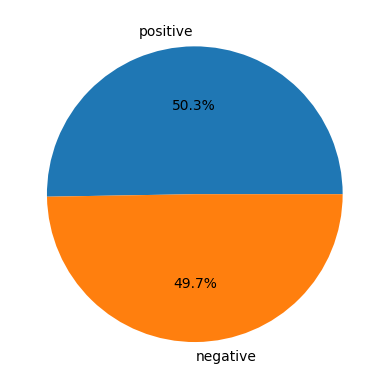

In [ ]:
plt.pie(df['sentiment'].value_counts(), labels=df['sentiment'].value_counts().index, autopct='%1.1f%%')

***# 2. Clean the reviews (remove HTML, punctuation, etc.)
***

In [ ]:
def clean_text(text):
    text = re.sub('<.*?>', '', text)            # Remove HTML tags
    text = re.sub('[^a-zA-Z]', ' ', text)       # Remove punctuation and digits
    text = text.lower()                         # Lowercase
    text = ' '.join(text.split())               # Remove extra whitespace
    return text

In [ ]:
df['clean_review'] = df['review'].apply(clean_text)

In [ ]:
df['clean_review']

,clean_review
0,one of the other reviewers has mentioned that ...
1,a wonderful little production the filming tech...
2,i thought this was a wonderful way to spend ti...
3,basically there s a family where a little boy ...
4,petter mattei s love in the time of money is a...
...,...
10017,the story is incredible it begins with a new k...
10018,ted danson was a great choice to play gulliver...
10019,possible spoilers although done before and bet...
10020,although i watched this film by myself thankfu...


**# 3. Encode the target
**

In [ ]:
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

In [ ]:
df['sentiment']

,sentiment
0,1
1,1
2,1
3,0
4,1
...,...
10017,1
10018,1
10019,1
10020,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['clean_review'], df['sentiment'], test_size=0.2, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# **Model Training **

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_vec, y_train)

MultinomialNB()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8518703241895261
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1020
           1       0.85      0.85      0.85       985

    accuracy                           0.85      2005
   macro avg       0.85      0.85      0.85      2005
weighted avg       0.85      0.85      0.85      2005



# **  Using CountVectorizer**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

vectorizer = CountVectorizer(stop_words='english', max_features=10000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

clf = LogisticRegression(max_iter=200)
clf.fit(X_train_vec, y_train)
y_pred = clf.predict(X_test_vec)


In [ ]:
y_pred

array([0, 1, 1, ..., 1, 1, 1])

In [ ]:
X_train_vec.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# *** Using RandomForest Classifier***

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_vec, y_train)
y_pred_rf = rf.predict(X_test_vec)


In [ ]:
y_pred_rf

array([0, 1, 1, ..., 1, 1, 1])

**calculate the accuray rate
**

In [ ]:
accuracy_lr = accuracy_score(y_test, y_pred)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

In [ ]:
print("the accuray rate of logsitics regression ",accuracy_lr)

the accuray rate of logsitics regression  0.859351620947631


In [ ]:
print("the accuray rate of random forest  ",accuracy_rf)

the accuray rate of random forest   0.8528678304239401


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_vec, y_train)
y_pred_knn = knn_model.predict(X_test_vec)

In [ ]:
y_pred_knn

array([0, 1, 1, ..., 1, 1, 0])

In [ ]:
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)
y_pred_nb = nb_model.predict(X_train_vec)

In [ ]:
y_pred_nb

array([0, 1, 0, ..., 0, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.859351620947631
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1020
           1       0.85      0.87      0.86       985

    accuracy                           0.86      2005
   macro avg       0.86      0.86      0.86      2005
weighted avg       0.86      0.86      0.86      2005

Confusion Matrix:
[[868 152]
 [130 855]]


In [ ]:
import pickle

# Save model
with open('model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Save vectorizer
with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)

# Load model
with open('model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Load vectorizer
with open('vectorizer.pkl', 'rb') as vectorizer_file:
    loaded_vectorizer = pickle.load(vectorizer_file)